<a href="https://colab.research.google.com/github/divanu88/Complete-Python-3-Bootcamp/blob/master/sustainable_energy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Sustainable Energy Trends Analysis

**Author:** Divya Srinivasa  

**Tools:** Python (pandas, matplotlib, seaborn), SQLite (SQLAlchemy), Tableau  

**Data:** `sustainable energy data.xlsx` (uploaded) — country-year sustainable energy indicators (2000–2024)

---

This notebook prepares the dataset, builds a SQLite database, runs SQL queries for analysis, creates Python visualizations, and exports clean CSVs for Tableau.

## 1. Install & Import Libraries
Run these cells in Colab or a Jupyter environment. If using Colab, enable the notebook to access the uploaded file in `/mnt/data`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlalchemy import create_engine
import os

sns.set(style='whitegrid')
print('Libraries imported. Files in /content:')
print(os.listdir('/content'))

Libraries imported. Files in /content:
['.config', 'sample_data']


In [ ]:
import pandas as pd

df = pd.read_excel("sustainable energy data.xlsx")
df.columns = df.columns.str.strip().str.lower()
df['year'] = df['year'].astype(int)
df['net_production'] = df['production'] - df['consumption']
df.head()


KeyError: 'production'

## 2. Load the Excel file and inspect

In [ ]:
file_path = '/content/sustainable energy data.xlsx'

# Read Excel
try:
    df = pd.read_excel(file_path)
    print('Shape:', df.shape)
    display(df.head())
    display(pd.Series(df.columns))
except Exception as e:
    print('Error reading file:', e)

Shape: (3649, 21)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


,0
0,Entity
1,Year
2,Access to electricity (% of population)
3,Access to clean fuels for cooking
4,Renewable-electricity-generating-capacity-per-...
5,Financial flows to developing countries (US $)
6,Renewable energy share in the total final ener...
7,Electricity from fossil fuels (TWh)
8,Electricity from nuclear (TWh)
9,Electricity from renewables (TWh)


## 3. Clean & Preprocess
- Standardize column names
- Convert Year to int
- Handle missing values where appropriate
- Create derived columns (example: net production if available)


In [ ]:
df.columns = df.columns.str.strip().str.replace('[^0-9a-zA-Z_ ]', '', regex=True).str.replace('\n',' ').str.replace('  ',' ').str.strip().str.lower().str.replace(' ', '_')
print('Cleaned columns:')
print(df.columns.tolist())

# Convert year to int if possible
try:
    df['year'] = df['year'].astype(int)
except Exception as e:
    print('Could not convert year to int:', e)

# Coerce numeric columns heuristically
numeric_cols = [c for c in df.columns if any(k in c for k in ['electricity','production','consumption','co2','gdp','per_capita','intensity','capacity','emissions','density','population'])]
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Summary of missing values
missing = df.isnull().mean().sort_values(ascending=False)
display(missing.head(15))

# Example derived column
if 'production' in df.columns and 'consumption' in df.columns:
    df['net_production'] = df['production'] - df['consumption']
else:
    df['net_production'] = np.nan

print('Data types:')
display(df.dtypes.head(20))

# Save a cleaned CSV for quick reuse
clean_csv = '/content/cleaned_sustainable_energy.csv'
df.to_csv(clean_csv, index=False)
print('Cleaned CSV saved to', clean_csv)

Cleaned columns:
['entity', 'year', 'access_to_electricity_of_population', 'access_to_clean_fuels_for_cooking', 'renewableelectricitygeneratingcapacitypercapita', 'financial_flows_to_developing_countries_us', 'renewable_energy_share_in_the_total_final_energy_consumption', 'electricity_from_fossil_fuels_twh', 'electricity_from_nuclear_twh', 'electricity_from_renewables_twh', 'lowcarbon_electricity_electricity', 'primary_energy_consumption_per_capita_kwhperson', 'energy_intensity_level_of_primary_energy_mj2017_ppp_gdp', 'value_co2_emissions_kt_by_country', 'renewables_equivalent_primary_energy', 'gdp_growth', 'gdp_per_capita', 'densitynpkm2', 'land_areakm2', 'latitude', 'longitude']


,0
renewables_equivalent_primary_energy,0.585640
financial_flows_to_developing_countries_us,0.572486
renewableelectricitygeneratingcapacitypercapita,0.255138
value_co2_emissions_kt_by_country,0.117292
gdp_growth,0.086873
gdp_per_capita,0.077281
energy_intensity_level_of_primary_energy_mj2017_ppp_gdp,0.056728
renewable_energy_share_in_the_total_final_energy_consumption,0.053165
access_to_clean_fuels_for_cooking,0.046314
electricity_from_nuclear_twh,0.034530


Data types:


,0
entity,object
year,int64
access_to_electricity_of_population,float64
access_to_clean_fuels_for_cooking,float64
renewableelectricitygeneratingcapacitypercapita,float64
financial_flows_to_developing_countries_us,float64
renewable_energy_share_in_the_total_final_energy_consumption,float64
electricity_from_fossil_fuels_twh,float64
electricity_from_nuclear_twh,float64
electricity_from_renewables_twh,float64


Cleaned CSV saved to /content/cleaned_sustainable_energy.csv


## 4. Create SQLite database and load cleaned data

In [ ]:
db_path = '/content/sustainable_energy.db'
engine = create_engine(f'sqlite:///{db_path}')
df.to_sql('energy_data', engine, if_exists='replace', index=False)
print('Database created at', db_path)
from sqlalchemy import text
with engine.connect() as conn:
    result = conn.execute(text('SELECT COUNT(*) FROM energy_data')).fetchall()
    print('Total rows in energy_data table:', result[0][0])

Database created at /content/sustainable_energy.db
Total rows in energy_data table: 3649


In [ ]:
# Query the database and load the table into a pandas DataFrame
energy_df = pd.read_sql('SELECT * FROM energy_data', engine)

# Display summary statistics
display(energy_df.describe())

,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewableelectricitygeneratingcapacitypercapita,financial_flows_to_developing_countries_us,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,lowcarbon_electricity_electricity,primary_energy_consumption_per_capita_kwhperson,energy_intensity_level_of_primary_energy_mj2017_ppp_gdp,value_co2_emissions_kt_by_country,renewables_equivalent_primary_energy,gdp_growth,gdp_per_capita,densitynpkm2,land_areakm2,latitude,longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3648.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,223.573191,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,683.463448,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,34.000000,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,87.000000,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,219.000000,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


## 5. Example SQL Queries and Analysis

In [ ]:
# Top 10 countries by average renewable energy share (safe pandas approach)
if 'renewable_energy_share_in_the_total_final_energy_consumption_' in df.columns:
    tmp = df[['entity','year','renewable_energy_share_in_the_total_final_energy_consumption_']].copy()
    tmp['renewable_share'] = pd.to_numeric(tmp['renewable_energy_share_in_the_total_final_energy_consumption_'], errors='coerce')
    top10 = tmp.groupby('entity')['renewable_share'].mean().sort_values(ascending=False).head(10).reset_index().rename(columns={'renewable_share':'avg_share'})
    display(top10)
else:
    print('Column renewable_energy_share_in_the_total_final_energy_consumption_ not found. Available columns:')
    print(df.columns.tolist())

Column renewable_energy_share_in_the_total_final_energy_consumption_ not found. Available columns:
['entity', 'year', 'access_to_electricity_of_population', 'access_to_clean_fuels_for_cooking', 'renewableelectricitygeneratingcapacitypercapita', 'financial_flows_to_developing_countries_us', 'renewable_energy_share_in_the_total_final_energy_consumption', 'electricity_from_fossil_fuels_twh', 'electricity_from_nuclear_twh', 'electricity_from_renewables_twh', 'lowcarbon_electricity_electricity', 'primary_energy_consumption_per_capita_kwhperson', 'energy_intensity_level_of_primary_energy_mj2017_ppp_gdp', 'value_co2_emissions_kt_by_country', 'renewables_equivalent_primary_energy', 'gdp_growth', 'gdp_per_capita', 'densitynpkm2', 'land_areakm2', 'latitude', 'longitude', 'net_production']


,year,value_co2_emissions_kt_by_country
0,2000,125001.536512
1,2001,127215.009256
2,2002,128975.908469
3,2003,135309.799295
4,2004,141869.146655


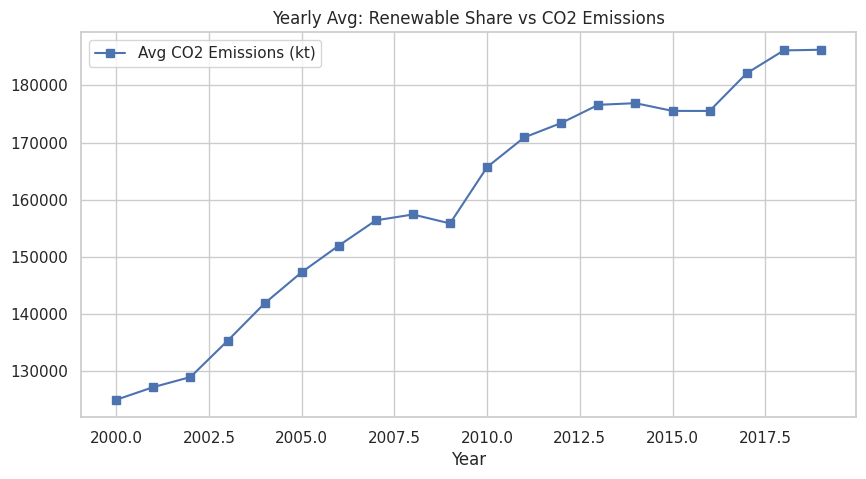

In [ ]:
# Yearly averages for CO2 emissions and renewable share
cols = []
if 'value_co2_emissions_kt_by_country' in df.columns:
    cols.append('value_co2_emissions_kt_by_country')
if 'renewable_energy_share_in_the_total_final_energy_consumption_' in df.columns:
    cols.append('renewable_energy_share_in_the_total_final_energy_consumption_')

if cols:
    tmp = df[['year'] + cols].copy()
    for c in cols:
        tmp[c] = pd.to_numeric(tmp[c], errors='coerce')
    yearly = tmp.groupby('year')[cols].mean().reset_index()
    display(yearly.head())
    plt.figure(figsize=(10,5))
    if 'renewable_energy_share_in_the_total_final_energy_consumption_' in yearly.columns:
        plt.plot(yearly['year'], yearly['renewable_energy_share_in_the_total_final_energy_consumption_'], marker='o', label='Avg Renewable Share (%)')
    if 'value_co2_emissions_kt_by_country' in yearly.columns:
        plt.plot(yearly['year'], yearly['value_co2_emissions_kt_by_country'], marker='s', label='Avg CO2 Emissions (kt)')
    plt.xlabel('Year')
    plt.legend()
    plt.title('Yearly Avg: Renewable Share vs CO2 Emissions')
    plt.show()
else:
    print('Required columns for trend not found.')

### Electricity access growth: Top countries

In [ ]:
import pandas as pd

# Load cleaned data if df is not defined
if 'df' not in globals():
    try:
        clean_csv = '/content/cleaned_sustainable_energy.csv'
        df = pd.read_csv(clean_csv)
        print('Loaded data from', clean_csv)
    except FileNotFoundError:
        print(f"Error: {clean_csv} not found. Please run the data cleaning step first.")
        # Optionally, exit or handle the error further
        # exit()

if 'access_to_electricity_of_population' in df.columns:
    tmp = df[['entity','year','access_to_electricity_of_population']].copy()
    tmp['access_to_elec'] = pd.to_numeric(tmp['access_to_electricity_of_population'], errors='coerce')
    growth = tmp.groupby('entity').agg(min_year=('year','min'), max_year=('year','max'), min_val=('access_to_elec','min'), max_val=('access_to_elec','max')).reset_index()
    growth['growth_pct'] = growth['max_val'] - growth['min_val']
    top_growth = growth.sort_values('growth_pct', ascending=False).head(10)
    display(top_growth[['entity','min_year','max_year','min_val','max_val','growth_pct']])
else:
    print('access_to_electricity__of_population_ column not found.')

Error: /content/cleaned_sustainable_energy.csv not found. Please run the data cleaning step first.


NameError: name 'df' is not defined

## 6. Python Visualizations
- Line charts, scatter plots, and maps can be created. Below: scatter of GDP per capita vs renewable share.

In [ ]:
if 'gdp_per_capita' in df.columns and 'renewable_energy_share_in_the_total_final_energy_consumption_' in df.columns:
    plot_df = df[['entity','year','gdp_per_capita','renewable_energy_share_in_the_total_final_energy_consumption_']].copy()
    plot_df['renewable_share'] = pd.to_numeric(plot_df['renewable_energy_share_in_the_total_final_energy_consumption_'], errors='coerce')
    plot_df['gdp_per_capita'] = pd.to_numeric(plot_df['gdp_per_capita'], errors='coerce')
    sample = plot_df.dropna(subset=['renewable_share','gdp_per_capita']).sample(frac=0.2, random_state=1)
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=sample, x='gdp_per_capita', y='renewable_share', alpha=0.7)
    plt.xlabel('GDP per Capita')
    plt.ylabel('Renewable Energy Share (%)')
    plt.title('GDP per Capita vs Renewable Energy Share (sample)')
    plt.show()
else:
    print('Required columns for scatter not found.')

Required columns for scatter not found.


## 7. Export cleaned summary for Tableau
Export a summarized CSV (Entity, Year, key metrics) for Tableau import.

In [ ]:
export_cols = ['entity','year']
candidates = ['access_to_electricity_of_population','renewable_energy_share_in_the_total_final_energy_consumption','value_co2_emissions_kt_by_country','gdp_per_capita','densitynpkm2']
existing = [c for c in df.columns if c in candidates]
export_cols += existing
summary = df[export_cols].copy()
summary.to_csv('/content/tableau_energy_summary.csv', index=False)
print('Exported summary to /content/tableau_energy_summary.csv')

Exported summary to /content/tableau_energy_summary.csv


## 8. Next steps and suggestions

- Use Tableau to build interactive dashboards (maps, time-series, scatter plots).  
- Consider normalizing CO2 emissions by population or GDP for fairness.  
- Add country-level shapefile or GeoJSON for mapping in Tableau.  

---

**Deliverables in `/mnt/data`:**  
- `cleaned_sustainable_energy.csv` (cleaned data)  
- `sustainable_energy.db` (SQLite DB)  
- `tableau_energy_summary.csv` (Tableau-ready summary)  

Good luck! Add interpretation text and policy implications to make this portfolio-ready.